# **Project 2 Report**

Colton Morley

CS458

Adding all used libraries to beginning for simplicity

In [1]:
from sklearn import decomposition, datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

## **P2-1. Decision Tree**

**(a) Develop a decision tree based classifier to classify the 3 different types  of Iris (Setosa, Versicolour, and Virginica).**

In [2]:
#Load the iris dataset
iris = datasets.load_iris()

#Create Stratified k fold with 5 folds
#Using Stratified ensures same number of each iris type (In this case 10)
skf = StratifiedKFold(n_splits = 5)

#Create decision tree classifier
clf  = DecisionTreeClassifier()

totalAccuracy = 0

#Iterate through the 5 folds
for train_index, test_index in skf.split(iris.data, iris.target):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index], iris.target[train_index], iris.target[test_index]
    #Fit data into decision treeclf  = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    #Get and print accuracy of decision tree for each fold
    rounded_score = round(clf.score(X_test, y_test), 5)
    totalAccuracy += rounded_score
    print("Accuracy Score: ", rounded_score)
print("Average Accuracy Score: ", totalAccuracy/5)

#plt.figure(figsize = (20,10))
#plot_tree(clf, filled=True)
#plt.show()


Accuracy Score:  0.96667
Accuracy Score:  0.96667
Accuracy Score:  0.9
Accuracy Score:  1.0
Accuracy Score:  1.0
Average Accuracy Score:  0.966668


For part 1A, the Decision Tree is trained using stratified K-fold. By using the stratified k fold, it ensures that an equal amount of each iris type are chosen.  The program uses the skf.split method to divide the data into 5 equal splits, which results in a total of 120 training data and 30 test.  The accuracy score for each fold is printed along with the average accuracy score, for comparison.  There is also code to print the decision tree that is commented out.

**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree. Plot your decision tree.**

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Optimal Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}
Accuracy Score:  0.96667
Accuracy Score:  0.96667
Accuracy Score:  0.93333
Accuracy Score:  1.0
Accuracy Score:  1.0
Average Accuracy Score:  0.973334


 Confustion Matrix:
[[10  0  0]
 [ 0  8  2]
 [ 0  0 10]]


 Decision Tree Plot:


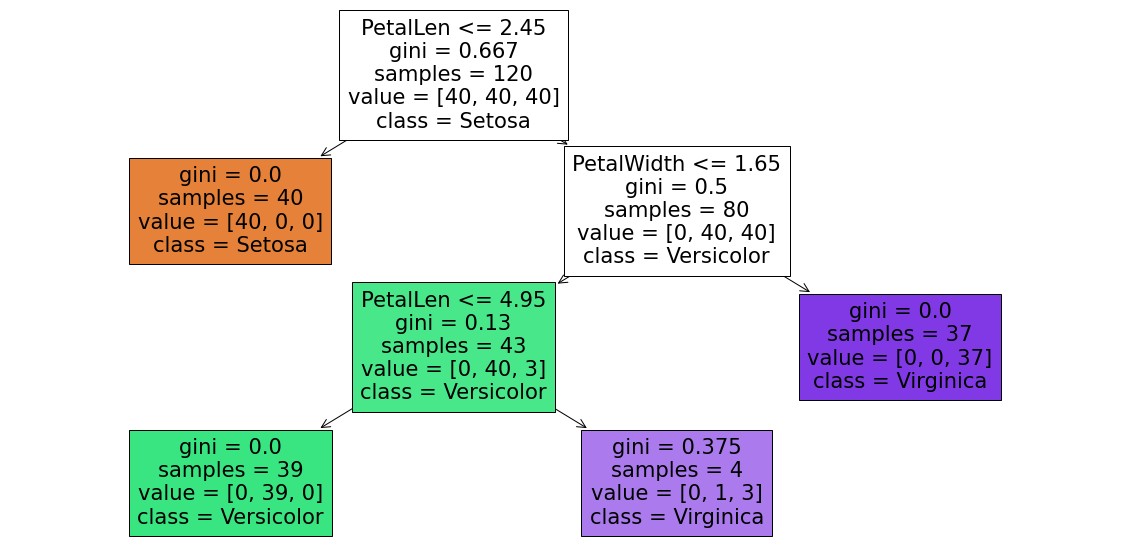

In [3]:
# Codes for P2-1(b)

#Create variables for data and target for simplicity
X = iris.data
y = iris.target

#LEAVE THIS????? THink it made it worse
clf  = DecisionTreeClassifier()
clf.fit(X,y)

#Create the options for different hyperparameters to optimize
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [2,3,4]
min_samples_split = range(1,10)
min_samples_leaf = range(1,5)

#Create parameters dicitonary to be used in gridsearch
parameters = {
    "criterion":criterion, 
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "splitter":splitter
    }


#Uses 5 fold gridsearch
grid = GridSearchCV(clf, param_grid=parameters,
                    cv=5, verbose=1,n_jobs=-1)

grid.fit(X,y)

#print optimal parameters for clarity
print("Optimal Parameters:", grid.best_params_)
#Create new Decision Tree classifier with these parameters
optimizedCLF = grid.best_estimator_

#Reset accuracy variavle to 0
totalAccuracy = 0

#Create arrays to store different tests from 5 fold
xTests = []
xTrains = []
yTrains = []
yTests = []

for train_index, test_index in skf.split(iris.data, iris.target):
    X_train, X_test, y_train, y_test = iris.data[train_index], iris.data[test_index], iris.target[train_index], iris.target[test_index]
    #Fit data into decision tree 
    optimizedCLF.fit(X_train, y_train)
    xTests.append(X_test)
    xTrains.append(X_train)
    yTrains.append(y_train)
    yTests.append(y_test)
    #Get and print accuracy of decision tree for each fold
    rounded_score = round(optimizedCLF.score(X_test, y_test), 5)
    totalAccuracy += rounded_score
    print("Accuracy Score: ", rounded_score)
print("Average Accuracy Score: ", totalAccuracy/5)

names = ['Setosa', 'Versicolor', 'Virginica']
featNames = ['SepalLen', 'SepalWidth', 'PetalLen', 'PetalWidth']

print('\n\n', "Confustion Matrix:" )
optimizedCLF.fit(xTrains[2], yTrains[2])
y_test_predict = optimizedCLF.predict(xTests[2])
print(confusion_matrix(yTests[2], y_test_predict))

print('\n\n', "Decision Tree Plot:" )
plt.figure(figsize = (20,10))
plot_tree(optimizedCLF, filled=True, class_names = names, feature_names = featNames)
plt.show()





For Part B, the parameters are optimized using gridsearch to test a range of different options for parameters.  When not adding any parameters in part A, the decision tree was very accurate but resulted in a relatively complex decision tree with 17 nodes.  When using the optimized parameters the decision tree becomes much less complex while maintaining similar levels of accuracy.

# **P2-2. Model Overfitting**

**(a) Generate the dataset as in slide 56 in Chapter 3**

Plotted Data:


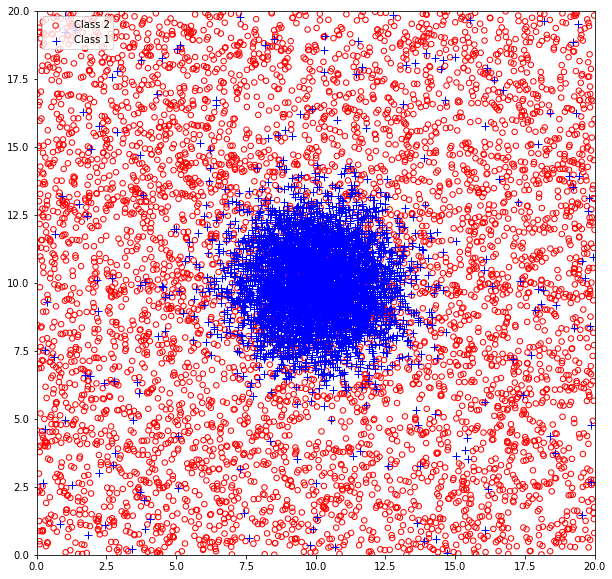

In [4]:
# Codes for P2-2(a)


#Create mean and covariance
mean = (10,10)
cov = [[2,0],[0,2]]
#Generate 5000 points with gaussian (normal) distribution around 10,10 with covariance [2,0], [0,2]
C1 = np.random.multivariate_normal(mean, cov, 5000)
#Generate 200 points with uniform distribution in plane {(0,0), (0,20), (20,0), (20,20)}.
uni = np.random.uniform(low=0,high=20,size=(200,2))
C1 = np.concatenate((C1,uni), axis=0)
#Generate 5200 points with uniform distribution in plane {(0,0), (0,20), (20,0), (20,20)}.
C2 = np.random.uniform(low=0,high=20,size=(5200,2))

#Plot data with formatting to resemble slide 56 CH3
print("Plotted Data:")
plt.figure(figsize = (10,10))
plt.scatter(*zip(*C2), s=30, label='Class 2', facecolors='none', edgecolors='r')
plt.scatter(*zip(*C1), s=60, c='blue', label='Class 1', marker='+', linewidths=1)
plt.legend(loc=2, prop={'size': 10})
plt.ylim(0,20)
plt.xlim(0,20)
plt.show()



**(b) Randomly select 10% of the data as test dataset and the remaining 90% of the data as training dataset. Train decision trees by increasing the number of nodes of the decision trees until the training error becomes 0. Plot the training errors and the testing errors under different numbers of nodes and explain the model underfitting and model overfitting.**

In [5]:
# Codes for P2-2(b)
a = ([1] * 2600 + [2] * 2600)
np.random.shuffle(a)
#Randomly select 10% as test and 90% as training
X_train, X_test, y_train, y_test = train_test_split(C1, a, test_size=0.1, shuffle=True)
testerrorpNode = [0,1.0]
trainerrorpNode = [0,1.0]

#X = nodes y = training error
for i in range(2,150):
    clf = DecisionTreeClassifier(max_leaf_nodes=i)
    clf.fit(X_train, y_train)
    trainPred = clf.predict(X_train)
    testPred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, testPred)
    testerrorpNode.append([i, accuracy])
    accuracy = accuracy_score(y_train, trainPred)
    trainerrorpNode.append([i,accuracy])
plt.xlabel("Number of Nodes")
plt.ylabel("Error")
plt.plot(trainerrorpNode[0], trainerrorpNode[1], label='Train Error', c='blue')
plt.plt(testerrorpNode[0], testerrorpNode[1] label='Test Error', c='red')
lt.show


<function matplotlib.pyplot.show(close=None, block=None)>

I have had trouble getting the graphs to resemble the slides, and I think that I am missing some knowledge from the prompt or am confused about what these randomly generated numbers should be compared to.  However using the slides from the textbook as a reference, you can see that when the data is underfit, with a small number of nodes, both the training and testing errors are very high because it does not split enough to make enough distinctions.  As the number of nodes gets very high, the training error becomes near 0 because with that many nodes it can account for every difference in the training set, but this causes issues because it is to specific to the training set and when a new test set is introduced, the error is very high.

# **P2-3. Text Documents Classification**

**(a) Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Print the number of documents in the training dataset and the test dataset. Print the number of attributes in the training dataset.**

In [6]:
# Codes for P2-3(a)
#Create list of categories of interest
cats = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
#Create training and testing data from 20newsgroups
news_train = fetch_20newsgroups(subset='train', categories=cats, remove=('headers', 'footers', 'quotes'))
news_test = fetch_20newsgroups(subset='test', categories=cats,remove=('headers', 'footers', 'quotes'))
#Print Number of documents in training and testing and number of attributes in training
print("Number of Documents in training dataset:",len(news_train.filenames))
print("Number of Documents in testing dataset:",len(news_test.filenames))
print("Number of Attributes in training dataset:",len(news_train.target_names))


Number of Documents in training dataset: 2148
Number of Documents in testing dataset: 1430
Number of Attributes in training dataset: 4


**(b) Optimize the parameters of your decision tree to maximize the classification accuracy. Show the confusion matrix of your decision tree.**

In [7]:
# Codes for P2-3(b)

#Convert text to vectors to use in decision tree
vectorizer = TfidfVectorizer()
xTrain = vectorizer.fit_transform(news_train.data)
xTest = vectorizer.transform(news_test.data)


criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = range(10,20)
min_samples_split = range(1,10)
min_samples_leaf = range(1,5)

#Create parameters dicitonary to be used in gridsearch
parameters = {
    "criterion":criterion, 
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "splitter":splitter
    }

#Uses 5 fold gridsearch
grid = GridSearchCV(clf, param_grid=parameters,
                    cv=3, verbose=1,n_jobs=-1)

grid.fit(xTrain, news_train.target)

#print optimal parameters for clarity
print("Optimal Parameters:", grid.best_params_)
#Create new Decision Tree classifier with these parameters
optCLF = grid.best_estimator_
optCLF.fit(xTrain, news_train.target)
ypred = optCLF.predict(xTest)
rounded_score = round(optCLF.score(xTest, news_test.target), 5)
print(confusion_matrix(news_test.target, ypred))
print("Accuracy:", rounded_score)


#plt.figure(figsize = (20,10))
#plot_tree(clf, filled=True)
#plt.show()

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
Optimal Parameters: {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 2, 'min_samples_split': 7, 'splitter': 'random'}
[[204 173  12   0]
 [ 17 376   2   1]
 [ 11 229 152   2]
 [  5 142   1 103]]
Accuracy: 0.58392


This optimization process uses the same gridsearch that is used in part 1b.  The gridsearch in this case only uses 3fold cross validation because my computer was taking a long time trying to do 5 over and over again during testing.  The accuracy of this is still very low, even after the gridsearch process, and I think that my lack of kowledge about the dataset and text to vector conversions is limiting my ability to find the major issue that is causing this.